# CAR PRICE PREDICTION PROJECT

Name=Sucharitha A M
Internship Batch=16th

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette("GnBu_d")

# Loading the raw data

In [2]:
df = pd.read_csv('car price.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

Dataset contains 4340 rows and 8 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Check for any missing value in data set and treat it

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Dataset contains 8 columns

In [6]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# Summary statistics

Exploring the descriptive statistics of the variables

In [8]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Data Visualization

<AxesSubplot:xlabel='name', ylabel='count'>

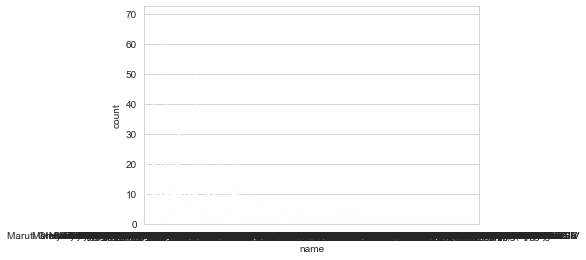

In [9]:
sns.countplot(df['name'])

Here data is not normally distributed in all columns

<AxesSubplot:xlabel='fuel', ylabel='count'>

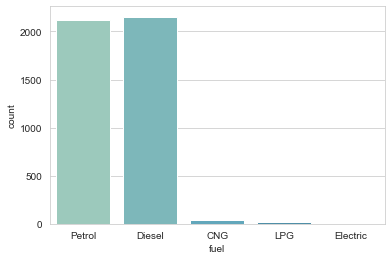

In [10]:
sns.countplot(df['fuel'])

Here data is not normally distributed in all columns

<AxesSubplot:xlabel='owner', ylabel='count'>

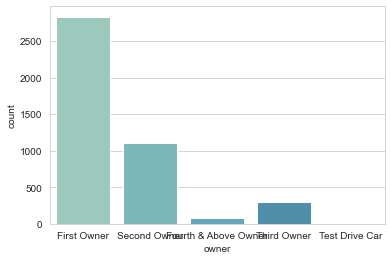

In [11]:
sns.countplot(df['owner'])

Here data is not normally distributed in all columns

<AxesSubplot:xlabel='seller_type', ylabel='count'>

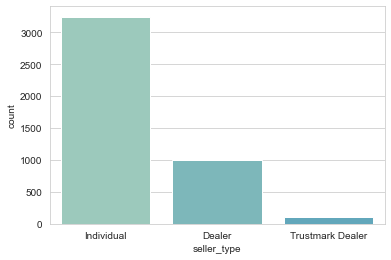

In [12]:
sns.countplot(df['seller_type'])

Here data is not normally distributed in all columns

<AxesSubplot:>

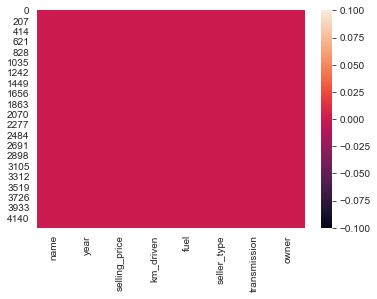

In [13]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [14]:
dfcor=df.corr()
dfcor

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<AxesSubplot:>

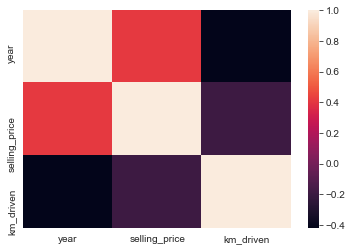

In [15]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

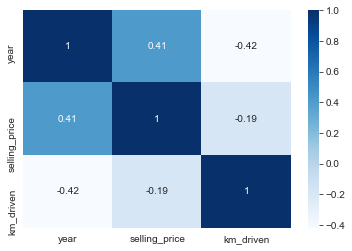

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are highly correlated

<AxesSubplot:>

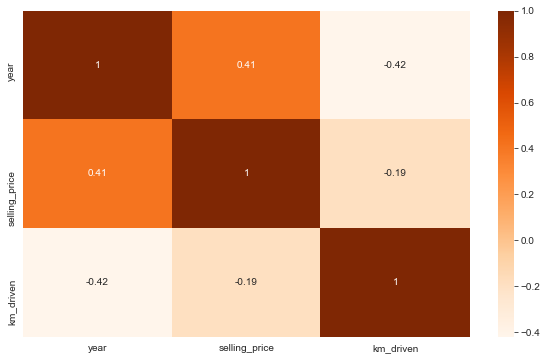

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

# Plotting outliers

In [18]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Dataset contains 8 coulmns

<AxesSubplot:>

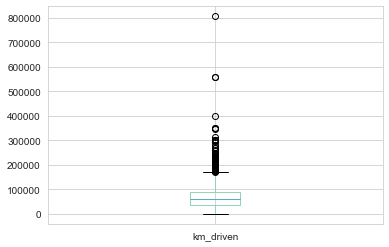

In [19]:
df["km_driven"].plot.box()

Here  boxplot have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

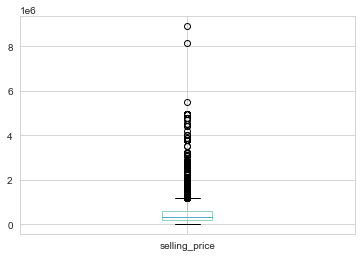

In [20]:
df["selling_price"].plot.box()

Here boxplot have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

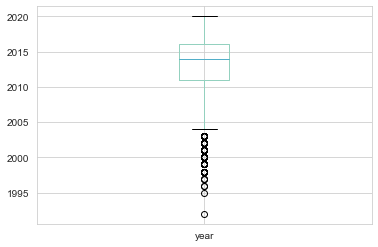

In [21]:
df["year"].plot.box()

Here boxplot have outside the viscous so we can find here outliers easily.

In [22]:
df.shape

(4340, 8)

Dataset contains 4340 rows and 8 columns

# Preprocessing

In [23]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [24]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
90%,2018.000000,9.000000e+05,120000.000000
95%,2019.000000,1.300000e+06,140000.000000
99%,2020.000000,3.200000e+06,220000.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Check for any missing value in data set and treat it

In [26]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# Feature Extraction

In [27]:
# Creating a new feature called total no. of years old my car,bcz It's important to know how many years old the car is.
df['Car_age'] = 2020-df['year']
df.drop(labels='year',axis=1,inplace=True)

In [28]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,6


# Data exploration

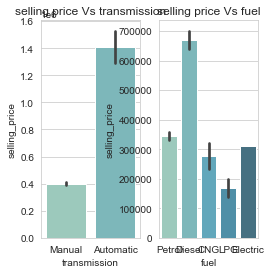

In [29]:
plt.subplot(1,3,2)
sns.barplot(df['transmission'],df['selling_price'])
plt.title('selling price Vs transmission')

plt.subplot(1,3,3)
sns.barplot(df['fuel'],df['selling_price'])
plt.title('selling price Vs fuel')

plt.show()

1.Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals

2.It can be observed that Selling Price would be higher for cars that are Automatic.

3.Selling Price of cars with Fuel of Diesel is higher than Petrol and CNG 

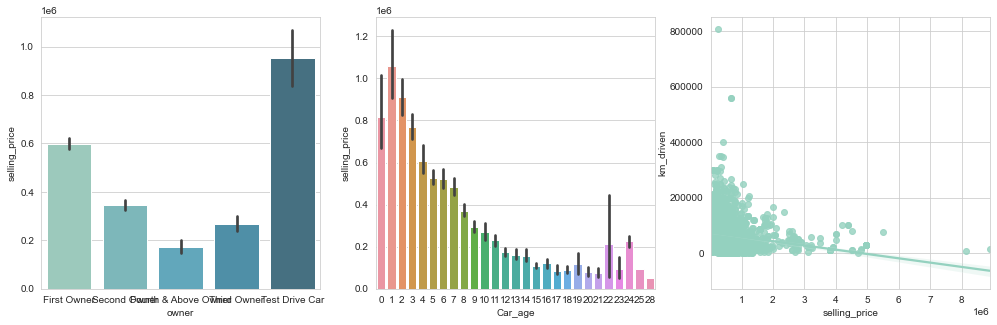

In [30]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['owner'],df['selling_price'])

plt.subplot(1,3,2)
sns.barplot(df['Car_age'],df['selling_price'])

plt.subplot(1,3,3)
sns.regplot(df['selling_price'],df['km_driven'])
plt.show()

1.Selling Price is high with less Owners used Cars 

2.Selling Price of cars 2 years old would be high and gradually decreases with car of 17 years old 

3.Lesser the Kms driven higher the Selling Price 

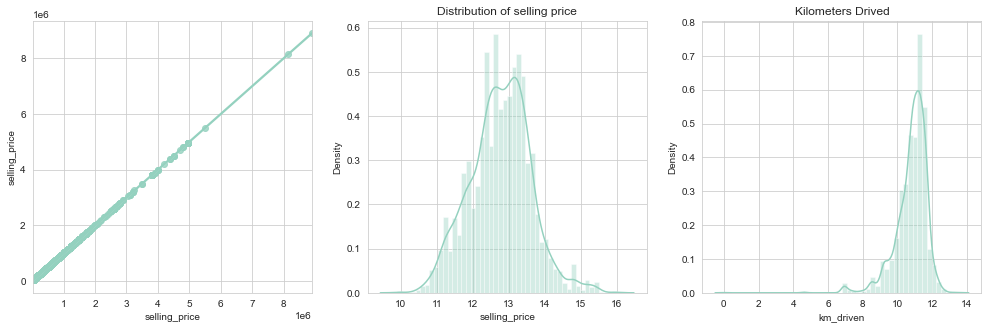

In [31]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(df['selling_price'],df['selling_price'])

plt.subplot(1,3,2)
sns.distplot(np.log(df['selling_price']))
plt.title('Distribution of selling price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['km_driven']))
plt.title('Distribution of km_drived')


plt.title('Kilometers Drived')
plt.show()

Selling Price tends to increase with increase in the Present Price of cars

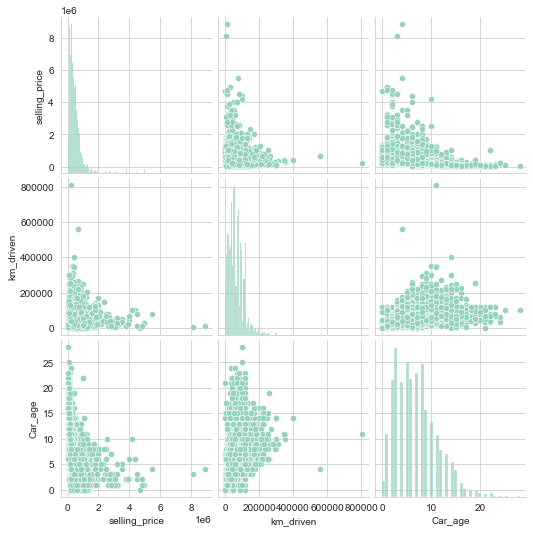

In [32]:
sns.pairplot(df)

In [33]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,6


# Dealing With Categorical Variables

In [34]:
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['name'].unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']


In [35]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,13
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,13
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,8
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,3
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,6


# Label Encoding Method

In [36]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['name']=LE.fit_transform(df['name'])


In [37]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['selling_price']=LE.fit_transform(df['selling_price'])


In [38]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['fuel']=LE.fit_transform(df['fuel'])
df['km_driven']=LE.fit_transform(df['km_driven'])
df['seller_type']=LE.fit_transform(df['seller_type'])
df['transmission']=LE.fit_transform(df['transmission'])
df['owner']=LE.fit_transform(df['owner'])


In [39]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age
0,775,17,474,4,1,1,0,13
1,1041,60,335,4,1,1,0,13
2,505,236,607,1,1,1,0,8
3,118,114,309,4,1,1,0,3
4,279,193,681,1,1,1,2,6


# Removing Outlier Method

In [40]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.05852176, 1.53130928, 0.4127312 , ..., 0.33927557, 0.66507931,
        1.44507431],
       [0.72352031, 1.11150316, 0.28099402, ..., 0.33927557, 0.66507931,
        1.44507431],
       [0.61647677, 0.60677303, 1.07651145, ..., 0.33927557, 0.66507931,
        0.2587948 ],
       ...,
       [0.06352175, 1.22865836, 0.77706171, ..., 0.33927557, 0.95651856,
        0.97056251],
       [0.92647609, 1.40733352, 0.90682326, ..., 0.33927557, 0.66507931,
        0.69022881],
       [1.0060197 , 0.70145998, 0.67027867, ..., 0.33927557, 0.66507931,
        0.69022881]])

In [41]:
threshold=3
print(np.where(z>3))

(array([  61,  137,  372,  391,  631,  850, 1126, 1184, 1397, 1404, 1579,
       1598, 1669, 1699, 1927, 1943, 2044, 2097, 2337, 2342, 2495, 2560,
       2635, 2777, 2904, 2908, 2972, 3237, 3334, 3371, 3396, 3532, 3550,
       3621, 3622, 3661, 3849, 3856, 3889, 3984, 4325], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
      dtype=int64))


In [42]:
df_new=df[(z<3).all(axis=1)]
df_new

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Car_age
0,775,17,474,4,1,1,0,13
1,1041,60,335,4,1,1,0,13
2,505,236,607,1,1,1,0,8
3,118,114,309,4,1,1,0,3
4,279,193,681,1,1,1,2,6
...,...,...,...,...,...,...,...,...
4335,602,178,528,1,1,1,2,6
4336,601,178,528,1,1,1,2,6
4337,777,48,547,4,1,1,2,11
4338,381,318,573,1,1,1,0,4


In [43]:
df.shape

(4340, 8)

Dataset contains 4340 rows and 8 columns

In [44]:
df_new.shape

(4299, 8)

New Dataset contains 4299 rows and 8 columns

# Standard Scaler Method

In [45]:
Standard Scaler Methodfrom sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [46]:
scaledX

array([[ 0.05852176, -1.53130928,  0.4127312 , ...,  0.33927557,
        -0.66507931,  1.44507431],
       [ 0.72352031, -1.11150316, -0.28099402, ...,  0.33927557,
        -0.66507931,  1.44507431],
       [-0.61647677,  0.60677303,  1.07651145, ...,  0.33927557,
        -0.66507931,  0.2587948 ],
       ...,
       [ 0.06352175, -1.22865836,  0.77706171, ...,  0.33927557,
         0.95651856,  0.97056251],
       [-0.92647609,  1.40733352,  0.90682326, ...,  0.33927557,
        -0.66507931, -0.69022881],
       [ 1.0060197 , -0.70145998, -0.67027867, ...,  0.33927557,
        -0.66507931, -0.69022881]])

In [47]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [48]:
Y.explained_variance_ratio_

array([0.31366092, 0.17424835, 0.14129525, 0.11160753, 0.10736653,
       0.07904731, 0.04340438, 0.02936972])

In [49]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 31.36609244,  48.79092769,  62.92045285,  74.08120601,
        84.8178595 ,  92.7225904 ,  97.06302822, 100.        ])

In [50]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 7


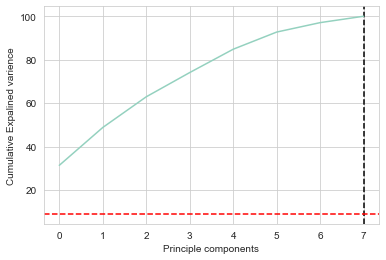

In [51]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

# Handling The Missing Values

In [52]:
df.isnull().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Car_age          0
dtype: int64

In [53]:
df["name"]=df["name"].fillna(df["name"].mean())
df["fuel"]=df["fuel"].fillna(df["fuel"].median())

# Checking Skewness

In [54]:
df.skew()

name            -0.093817
selling_price    0.550596
km_driven       -0.129067
fuel             0.012839
seller_type     -0.696918
transmission    -2.609083
owner            1.253473
Car_age          0.833240
dtype: float64

# Feature Engeneering Model


In [55]:
x_train = df.drop(['selling_price'],axis=1)
y_train = df.selling_price


In [56]:
x_train.head()

,name,km_driven,fuel,seller_type,transmission,owner,Car_age
0,775,474,4,1,1,0,13
1,1041,335,4,1,1,0,13
2,505,607,1,1,1,0,8
3,118,309,4,1,1,0,3
4,279,681,1,1,1,2,6


In [57]:
y_train.head()

0     17
1     60
2    236
3    114
4    193
Name: selling_price, dtype: int64

In [58]:
x_train.shape

(4340, 7)

Here x_train contains 4340 rows and 7 columns

In [59]:
y_train.shape

(4340,)

Here y_train contains 4340 rows and zero columns

# Regression Methods

In [60]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [61]:
x= df.drop(['selling_price'],axis=1)
y = df["selling_price"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=0, test_size=0.2)

In [62]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

47.28567051403471
49.06407482067546
49.24071269089119
55.49804197117878
54.78952764264093
54.729256184561045
49.6067541507977
49.626768570970036
52.94759574200957
51.54154085234678
50.402188176719804
49.979106862185155
47.97176424084602
50.62265303890973
54.718389378304025
54.05030893477662
48.65961390231248
56.089444472105654
50.61434838602268
51.532724505578216
53.756647926067615
51.478130747518286
52.941711383539875
49.84505242236788
51.94711197389583
52.617853445402254
49.34148312570544
50.96621176242876
52.08224390579626
51.46586808790273
51.878043849655164
50.18737415544002
52.341323953671925
53.38119435997289
50.10550452883718
55.55985088458326
49.886279531322465
51.999996458627706
49.02892162247209
49.10965090381155
55.498705249827466
48.9723635694654
50.28236737611174
50.135474951843946
53.117373043726936
53.38288761178825
50.514767758052656
52.50819137313545
54.126701845567105
47.58835577139038
50.99004801439999
51.22074676157775
52.58605876109591
52.053383200749074
51.093888

In [63]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)


DecisionTreeRegressor()

In [64]:
y_pred = regressor.predict(x_test)

In [65]:
y_pred

array([ 55.,  78., 298., ..., 114.,  89., 156.])

In [66]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

99.97

In [67]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [68]:
y_pred = regressor.predict(x_test)
y_pred

array([ 48.21  ,  53.2725, 211.64  , ..., 108.28  , 141.03  , 110.21  ])

In [69]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

97.72

In [70]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [71]:
y_pred = regressor.predict(x_test)
y_pred

array([ 10.4743197 ,  36.18084805, 127.69824871, ..., 111.79110472,
       199.18201882,  92.43568288])

In [72]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

61.76

In [73]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
regressor.fit(x_train,y_train)

GaussianNB()

In [74]:
y_pred = regressor.predict(x_test)
y_pred

array([ 12,  18, 331, ...,  90, 204,  50], dtype=int64)

In [75]:
nb_accuracy = round(regressor.score(x_train,y_train)*100,2)
nb_accuracy

11.56

In [76]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train,y_train)

SVR()

In [77]:
y_pred = regressor.predict(x_test)
y_pred

array([137.35067859, 147.08398047, 146.36704432, ..., 162.04443137,
       152.64488722, 169.228435  ])

In [78]:
svm_accuracy = round(regressor.score(x_train,y_train)*100,2)
svm_accuracy

10.56

In [79]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)


KNeighborsRegressor()

In [80]:
y_pred = regressor.predict(x_test)
y_pred

array([ 52. , 161.4, 260.8, ...,  89. , 110.4, 133. ])

In [81]:
knn_accuracy = round(regressor.score(x_train,y_train)*100,2)
knn_accuracy

68.75

# Cross Value Correction

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.7440703147551734


In [84]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.8459103444063839


In [85]:
from sklearn.svm import SVR
regressor = SVR()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.0945383251991948


In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.6188058467589761


In [87]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.5139559584017672


In [88]:
from sklearn.naive_bayes import GaussianNB
regressor = GaussianNB()
print(cross_val_score(regressor,x,y,cv=5).mean())

0.047004608294930875


So as we try diferent Regression Algorithms and found that "Random Forest Regressor Model" is giving better accuracy compare to other.

# Hyperparameter Tunning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [91]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [92]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [93]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

# Evaluate the Model

In [97]:
from sklearn.ensemble import RandomForestRegressor
regressor =RandomForestRegressor()
regressor.fit(x_train,y_train)
Final_mod =RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

86.33485227601075


# Saving the Model

In [95]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here the saving model FinalModle.pkl

# Prediction Method

In [98]:
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[ 52.49        53.21       213.26        75.12        87.54
 101.91       223.41        52.15        57.705      160.1
 127.39       391.          55.81       221.45       117.64
 204.06880952 202.44       214.         188.21       164.99666667
  52.36       107.69       238.5625     354.23       197.36
  76.83       194.77        88.75       199.11       305.15
  64.57       143.91        97.17333333  88.98        68.59
 245.        ]
[ 31  31 193 116  91 104 215  39  99 193 137 391  48 215  99 193 208 214
 176  83  50  84 222 320 210  62 201  52 137 264  52 137 114  76 101 245]


# Conclusions

1.Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.

2.Car age is effecting negatively as older the car lesser the Selling Price.

3.Selling Price of cars with Fuel type Diesel is higher.

4.Car of Manual type is of less priced whereas of Automatic type is high.

5.Cars sold by Individual tend to get less Selling Price when sold by Dealers.